## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F


import torchvision
from torchvision.datasets import MNIST
import torch.optim as optim

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

Text(0.5, 1.0, 'Image label: 1')

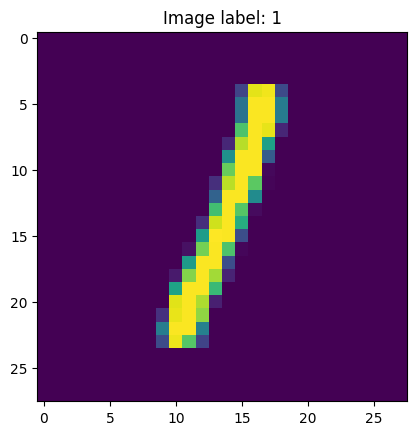

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(
    nn.Linear(1*784,512),
    nn.ReLU(),
    nn.Linear(512,10)
    #nn.Conv2d(3,6,3,padding=1), # 3 канала, 6 фильтров, 3x3 размер фильтра, padding по краям = 1
    #nn.ReLU(), 
    #nn.MaxPool2d(2),
    #nn.Linear(10,10)
)

Ниже доступны локальные тесты для проверки вашей модели:

In [4]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


In [5]:
y_predicted.shape

torch.Size([32, 10])

Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [6]:
def train_model(model,train_loader,loss_fn,optimizer,epochs: int, device=device):
    total = 0.0
    for epoch in range(epochs):
        model.train(True)
        for X,Y in train_loader:
            optimizer.zero_grad()
            X = X.reshape(-1,784)
            #X,Y = X.to(device), Y.to(device)
            output=model(X)
            print(output.shape,Y.shape)
            loss=loss_fn(output, Y)
            loss.backward()
            optimizer.step()
            total = total + loss.item() 
        avg_loss = total/len(train_loader)
        print(f'epoch {epoch+1}/{epochs}, loss: {avg_loss:.4f}')
    predicted_labels = []
    real_labels = []
    model.eval()
    with torch.no_grad():
        for X,Y in train_loader:
            X = X.reshape(-1,784)
            #X,Y = X.to(device), Y.to(device)
            y_predicted = model(X)
            predicted_labels.append(y_predicted.argmax(dim=1))
            real_labels.append(Y)
    
    predicted_labels = torch.cat(predicted_labels)
    real_labels = torch.cat(real_labels)
    train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
    print(f'Neural network accuracy on train set: {train_acc:3.5}')


In [7]:
device = torch.device("cpu")
#model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs=10
train_model(model, train_data_loader,nn.CrossEntropyLoss(),optimizer,epochs,device)

torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([32, 10]) torch.Size([32])
torch.Size([

KeyboardInterrupt: 

Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [7]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [8]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99367


In [9]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [10]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9751


Проверка, что пороги пройдены:

In [11]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [12]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!